<a href="https://colab.research.google.com/github/poorvis885/EDA-Analysis/blob/main/customer_segmentation_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#inport libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
# Download latest version of dataset using kagglehub
path = kagglehub.dataset_download("shwetabh123/mall-customers")
print("Path to dataset files:", path)

# Load dataset
file_path = f"{path}/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.describe())

Path to dataset files: /root/.cache/kagglehub/datasets/shwetabh123/mall-customers/versions/1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750

In [9]:
# Checking for missing values
print(df.isnull().sum())

# Selecting relevant features for clustering
X = df.iloc[:, [3, 4]].values  # Selecting 'Annual Income' and 'Spending Score'

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


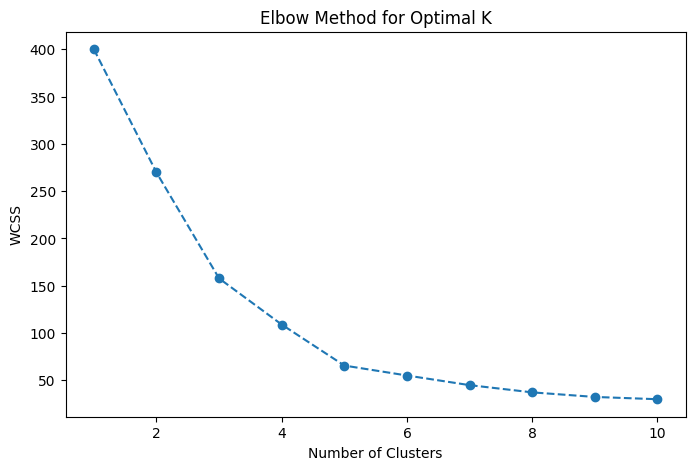

In [10]:
# Finding optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
# Applying K-Means with optimal clusters (assuming 5 clusters)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding cluster labels to dataset
df['Cluster'] = y_kmeans

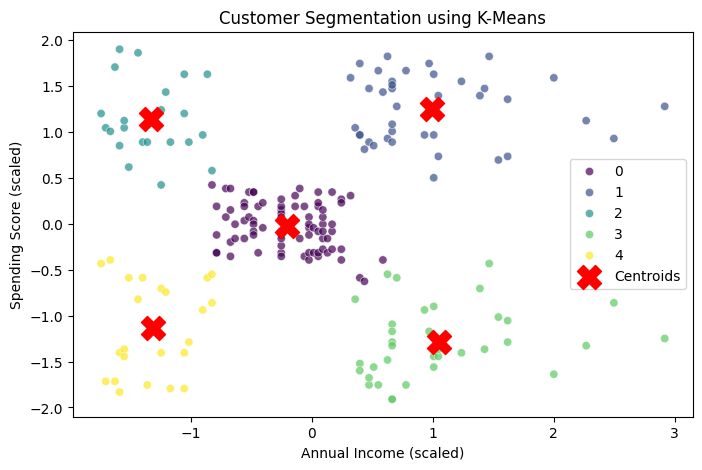

In [12]:
# Visualizing the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_kmeans, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()